In [ ]:
# Cf. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [3]:
# Librairie pandas (manipulation de données csv, dataframe, etc.)
import pandas as pd

# Import et lecture du corpus :
corpus = pd.read_csv('/Users/adesacy/Desktop/Etude-Beatles/corpus_tokmorph.csv')
corpus.head()

,Unnamed: 0,Unnamed: 0.1,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,0,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,1,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,2,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['INTJ'])"
3,3,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['INTJ'], ['ADJ'])"
4,4,1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['INTJ'],"(['INTJ'], ['ADJ'], ['NOUN'])"


In [4]:
corpus = corpus.drop('Unnamed: 0', 1)
corpus = corpus.drop('Unnamed: 0.1', 1)
corpus

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['INTJ'])"
3,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['INTJ'], ['ADJ'])"
4,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['INTJ'],"(['INTJ'], ['ADJ'], ['NOUN'])"
...,...,...,...,...,...,...,...,...,...,...
36074,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,to,['to'],['ADP'],"(['ADP'], ['VERB'], ['PRON'])"
36075,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,hide,['hide'],['VERB'],"(['VERB'], ['PRON'], ['NOUN'])"
36076,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,your,['your'],['PRON'],"(['PRON'], ['NOUN'], ['ADV'])"
36077,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,love,['love'],['NOUN'],"(['NOUN'], ['ADV'], ['NaN'])"


In [5]:
corpus

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['INTJ'])"
3,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['INTJ'], ['ADJ'])"
4,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['INTJ'],"(['INTJ'], ['ADJ'], ['NOUN'])"
...,...,...,...,...,...,...,...,...,...,...
36074,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,to,['to'],['ADP'],"(['ADP'], ['VERB'], ['PRON'])"
36075,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,hide,['hide'],['VERB'],"(['VERB'], ['PRON'], ['NOUN'])"
36076,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,your,['your'],['PRON'],"(['PRON'], ['NOUN'], ['ADV'])"
36077,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand Turn my face to the ...,love,['love'],['NOUN'],"(['NOUN'], ['ADV'], ['NaN'])"


In [7]:
# Sélection des colonnes pour le count : 

count = corpus[['Song', 'words']]
count

# Cross tab fonction pour compter les valeurs de chaque Songwriter
# on veut que notre index correspondent à notre corpus (LEN, MCC, LMC) et les colonnes à nos mots 
# Cf. https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe/47187144#47187144

count = pd.crosstab(index=count['Song'], columns=count['words'])
count
# Ajout de la colonne Songwriter(s) :

    # Téléchargement du corpus initial pour récupération de la variable Songwriters
    
corpus_clean = pd.read_csv('/Users/adesacy/Desktop/Etude-Beatles/corpus_nettoye.csv')

    # Reset de l'index pour éviter l'introduction de NaN

corpus_clean.reset_index(drop=False, inplace=True)
count.reset_index(drop=False, inplace=True)

# Concaténation de la colonne Songwriters : 

count = pd.concat([count, corpus_clean['Songwriter(s)']], axis=1)

count = count.set_index(['Songwriter(s)', 'Song'])
count

!  "  '  'Cause  \
Songwriter(s)    Song                                                       
Lennon           "A Day in the Life"                   0  0  0  0       0   
                 "A Hard Day's Night"                  0  1  0  0       0   
McCartney        "Across the Universe"                 0  0  0  0       0   
Lennon-McCartney "All I've Got to Do"                 24  0  0  0       0   
Lennon           "All My Loving"                       0  0  0  0       0   
...                                                   .. .. .. ..     ...   
McCartney        "You Won't See Me"                    0  0  0  0       0   
Lennon-McCartney "You'll Be Mine"                      0  1  0  0       0   
McCartney        "You're Going to Lose That Girl"      0  0  0  0       1   
Lennon           "You've Got to Hide Your Love Away"   0  0  2  0       0   
                 "Your Mother Should Know"             0  0  0  0       0   

                                                      'cause  'd  'll  'm  \
Songwriter(s)    Song                                                       
Lennon           "A Day in the Life"                       0   3    0   0   
                 "A Hard Day's Night"                      2   0    2   4   
McCartney        "Across the Universe"                     0   0    0   0   
Lennon-McCartney "All I've Got to Do"                      0   0    5   0   
Lennon           "All My Loving"                           0   0   15   4   
...                                                      ...  ..  ...  ..   
McCartney        "You Won't See Me"                        0   0    0   0   
Lennon-McCartney "You'll Be Mine"                          0   0    9   0   
McCartney        "You're Going to Lose That Girl"          0   0    3   0   
Lennon           "You've Got to Hide Your Love Away"       0   0    0   1   
                 "Your Mother Should Know"                 0   0    0   0   

                                                      're  ...  yet  yi  you  \
Songwriter(s)    Song                                      ...                 
Lennon           "A Day in the Life"                    0  ...    0   0    2   
                 "A Hard Day's Night"                   1  ...    0   0   12   
McCartney        "Across the Universe"                  0  ...    0   0    0   
Lennon-McCartney "All I've Got to Do"                   0  ...    0   0   14   
Lennon           "All My Loving"                        0  ...    0   0   10   
...                                                   ...  ...  ...  ..  ...   
McCartney        "You Won't See Me"                     2  ...    0   0   16   
Lennon-McCartney "You'll Be Mine"                       0  ...    0   0    5   
McCartney        "You're Going to Lose That Girl"      16  ...    0   0    9   
Lennon           "You've Got to Hide Your Love Away"    0  ...    0   0    6   
                 "Your Mother Should Know"              0  ...    0   0    0   

                                                      young  younger  your  \
Songwriter(s)    Song                                                        
Lennon           "A Day in the Life"                      0        0     0   
                 "A Hard Day's Night"                     0        0     0   
McCartney        "Across the Universe"                    0        0     0   
Lennon-McCartney "All I've Got to Do"                     0        0     1   
Lennon           "All My Loving"                          0        0     2   
...                                                     ...      ...   ...   
McCartney        "You Won't See Me"                       0        0     2   
Lennon-McCartney "You'll Be Mine"                         0        0     1   
McCartney        "You're Going to Lose That Girl"         0        0     0   
Lennon           "You've Got to Hide Your Love Away"      0        0     4   
                 "Your Mother Should Know"                0        0    11   

In [15]:
#count

In [10]:
# À lancer la première fois pour téléchargement...

# %pip install sklearn-pandas

Here we need to perform a few normalisations, such as z-scores each variable, and operating a vector-length normalisation (to euclidean length 1) for texts (cf. Evert et al., 2017, doi:10.1093/llc/fqx023).

**DÉBUT PARCOURS MODIFIÉ (JBC)**


In [8]:
# Calcul des z-scores :

# Pour chacun des n traits et des x sous-corpus d’auteurs, calculer un Zscore 
# qui décrit l’écart entre la présence de ce trait dans ce sous-corpus et la norme du corpus. 
# Pour ce faire, il faut soustraire la “moyenne de moyennes” du corpus pour le trait de 
# la présence de ce trait observée dans le sous-corpus, puis diviser le résultat par 
# l’écart-type du trait. La figure 7 présente la formule de calcul de la cote Z pour 
# le trait ‘i’, où C(i) représente la fréquence observée, la lettre grecque mu 
# représente la moyenne des moyennes, et la lettre grecque sigma représente l’écart-type.
# Cf. https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

import sklearn.preprocessing as preproc
import sklearn.pipeline

# Fonctions pour garder le format df :

#z-scores
scaler = preproc.StandardScaler().fit(count)
scaled_features = scaler.transform(count)
#vector-length normalisation, aka L2 Norm
transformer = preproc.Normalizer().fit(scaled_features)
scaled_features = transformer.transform(scaled_features)

#mapper = DataFrameMapper([(count.columns, StandardScaler())])
#scaled_features = mapper.fit_transform(count.copy(), 2576) # nb colonnes
scaled_features_count = pd.DataFrame(scaled_features, index=count.index, columns=count.columns)

# fit_transform(X[, y]) ==> Fit to data, then transform it.
# inverse_transform(X[, copy]) ==> Scale back the data to the original representation


In [9]:
scaled_features_count

!  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                 -0.002059 -0.002498   
                 "A Hard Day's Night"                -0.004375  0.017871   
McCartney        "Across the Universe"               -0.002113 -0.002564   
Lennon-McCartney "All I've Got to Do"                 0.168521 -0.006179   
Lennon           "All My Loving"                     -0.004480 -0.005437   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.003909 -0.004744   
Lennon-McCartney "You'll Be Mine"                    -0.005388  0.022009   
McCartney        "You're Going to Lose That Girl"    -0.005578 -0.006769   
Lennon           "You've Got to Hide Your Love Away" -0.004160 -0.005049   
                 "Your Mother Should Know"           -0.004201 -0.005098   

                                                             "         '  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                 -0.002502 -0.002349   
                 "A Hard Day's Night"                -0.005317 -0.004992   
McCartney        "Across the Universe"               -0.002568 -0.002411   
Lennon-McCartney "All I've Got to Do"                -0.006188 -0.005809   
Lennon           "All My Loving"                     -0.005444 -0.005112   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.004750 -0.004460   
Lennon-McCartney "You'll Be Mine"                    -0.006548 -0.006148   
McCartney        "You're Going to Lose That Girl"    -0.006779 -0.006364   
Lennon           "You've Got to Hide Your Love Away"  0.022788 -0.004746   
                 "Your Mother Should Know"           -0.005105 -0.004793   

                                                        'Cause    'cause  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                 -0.002591 -0.002442   
                 "A Hard Day's Night"                -0.005506  0.137730   
McCartney        "Across the Universe"               -0.002659 -0.002506   
Lennon-McCartney "All I've Got to Do"                -0.006408 -0.006040   
Lennon           "All My Loving"                     -0.005639 -0.005315   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.004920 -0.004637   
Lennon-McCartney "You'll Be Mine"                    -0.006781 -0.006392   
McCartney        "You're Going to Lose That Girl"     0.045339 -0.006617   
Lennon           "You've Got to Hide Your Love Away" -0.005236 -0.004935   
                 "Your Mother Should Know"           -0.005287 -0.004984   

                                                            'd       'll  \
Songwriter(s)    Song                                                      
Lennon           "A Day in the Life"                  0.035182 -0.006285   
                 "A Hard Day's Night"                -0.008187  0.008577   
McCartney        "Across the Universe"               -0.003954 -0.006450   
Lennon-McCartney "All I've Got to Do"                -0.009529  0.048272   
Lennon           "All My Loving"                     -0.008384  0.154774   
...                                                        ...       ...   
McCartney        "You Won't See Me"                  -0.007315 -0.011933   
Lennon-McCartney "You'll Be Mine"                    -0.010083  0.105107   
McCartney        "You're Going to Lose That Girl"    -0.010438  0.024918   
Lennon           "You've Got to Hide Your Love Away" -0.007785 -0.012700   
                 "Your Mother Should Know"           -0.007862 -0.012825   

                                                            'm       're  ...  \
Songwriter(s)    Song             

In [10]:
scaled_features_countb = scaled_features_count.reset_index(level=0, drop=True)

In [11]:
scaled_features_countb

,,!,"""",','Cause,'cause,'d,'ll,'m,'re,...,yet,yi,you,young,younger,your,yours,yourself,zapped,zoo
Song,,,,,,,,,,,,,,,,,,,,,
"""A Day in the Life""",-0.002059,-0.002498,-0.002502,-0.002349,-0.002591,-0.002442,0.035182,-0.006285,-0.004773,-0.004756,...,-0.001190,-0.000885,-0.009091,-0.001896,-0.000885,-0.005265,-0.000885,-0.001892,-0.000885,-0.000885
"""A Hard Day's Night""",-0.004375,0.017871,-0.005317,-0.004992,-0.005506,0.137730,-0.008187,0.008577,0.013591,0.000858,...,-0.002528,-0.001880,0.013397,-0.004028,-0.001880,-0.011189,-0.001880,-0.004020,-0.001880,-0.001880
"""Across the Universe""",-0.002113,-0.002564,-0.002568,-0.002411,-0.002659,-0.002506,-0.003954,-0.006450,-0.004899,-0.004881,...,-0.001221,-0.000908,-0.012489,-0.001945,-0.000908,-0.005404,-0.000908,-0.001941,-0.000908,-0.000908
"""All I've Got to Do""",0.168521,-0.006179,-0.006188,-0.005809,-0.006408,-0.006040,-0.009529,0.048272,-0.011805,-0.011762,...,-0.002942,-0.002188,0.023206,-0.004688,-0.002188,-0.002799,-0.002188,-0.004678,-0.002188,-0.002188
"""All My Loving""",-0.004480,-0.005437,-0.005444,-0.005112,-0.005639,-0.005315,-0.008384,0.154774,0.013918,-0.010350,...,-0.002589,-0.001925,0.007018,-0.004125,-0.001925,0.006533,-0.001925,-0.004116,-0.001925,-0.001925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""You Won't See Me""",-0.003909,-0.004744,-0.004750,-0.004460,-0.004920,-0.004637,-0.007315,-0.011933,-0.009063,0.010562,...,-0.002259,-0.001680,0.023662,-0.003599,-0.001680,0.005700,-0.001680,-0.003591,-0.001680,-0.001680
"""You'll Be Mine""",-0.005388,0.022009,-0.006548,-0.006148,-0.006781,-0.006392,-0.010083,0.105107,-0.012493,-0.012447,...,-0.003114,-0.002316,-0.011705,-0.004961,-0.002316,-0.002962,-0.002316,-0.004951,-0.002316,-0.002316
"""You're Going to Lose That Girl""",-0.005578,-0.006769,-0.006779,-0.006364,0.045339,-0.006617,-0.010438,0.024918,-0.012933,0.210778,...,-0.003223,-0.002397,0.004567,-0.005136,-0.002397,-0.014266,-0.002397,-0.005125,-0.002397,-0.002397


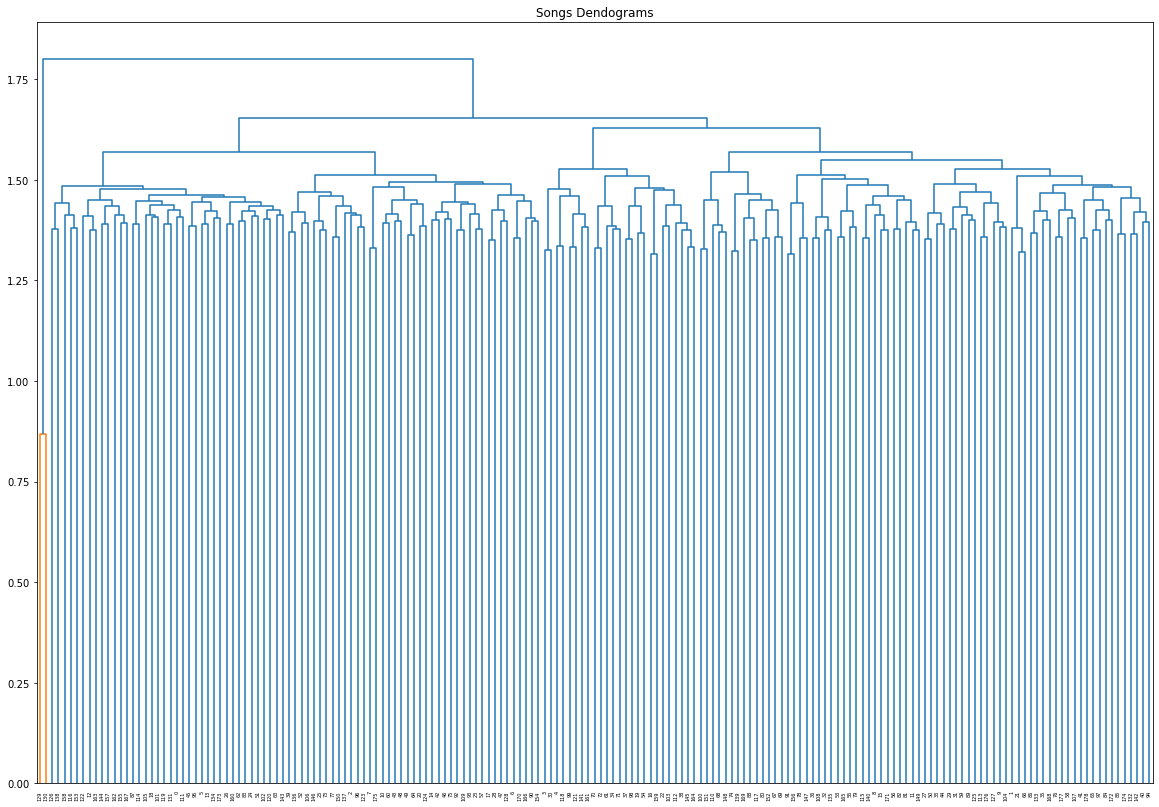

In [12]:
# CAH

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))
plt.title("Songs Dendograms")
Z = shc.linkage(scaled_features_countb, method='ward')
dend = shc.dendrogram(Z)

Ok, that's nice, but can't we get a better looking plot, with labels, appropriate coulours, etc. ?

In [258]:
#Verify that labelling is correct
#list(scaled_features_count.index)
#dend["leaves"]

('Lennon', '"Sgt. Pepper\'s Lonely Hearts Club Band (Reprise)"')

In [13]:
# Create labels
# First, labels
#nodeLabels = [s[0]+"_"+s[1] for s in list(scaled_features_count.index[dend["leaves"]])]
nodeLabels = [s[0]+"_"+s[1] for s in list(scaled_features_count.index)]
#nodeLabels = {dend["leaves"][i[0]]: nodeLabels[i[0]] for i in enumerate(nodeLabels)}
#{i: list(scaled_features_count.index)[i][0] for i in dend["leaves"] }
#nodeLabels

In [14]:
# Create colors
# Thanks to Ulrich Stern,
# https://stackoverflow.com/questions/38153829/custom-cluster-colors-of-scipy-dendrogram-in-python-link-color-func
cols = {i[0]: i[1][0] for i in enumerate(list(scaled_features_count.index))}
for col in cols:
    #print(cols.get(col))
    if cols.get(col) == 'Lennon':
        cols[col] = '#FF0000' #'red'
    elif cols.get(col) == 'McCartney':
        cols[col] =  '#0000FF' #'blue'
    else: 
        cols[col] = '#800080' # purple
    #print(cols[col])

#cols
dflt_col = "#808080"   # Unclustered gray
link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
  c1, c2 = (link_cols[x] if x > len(Z) else cols[x]
    for x in i12)
  link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

#link_cols
# and finally for leaf coloring
label_colors = {i[1]: cols[i[0]] for i in enumerate(nodeLabels)}

In [15]:
#nodeLabels[129]
#cols[129]
#label_colors

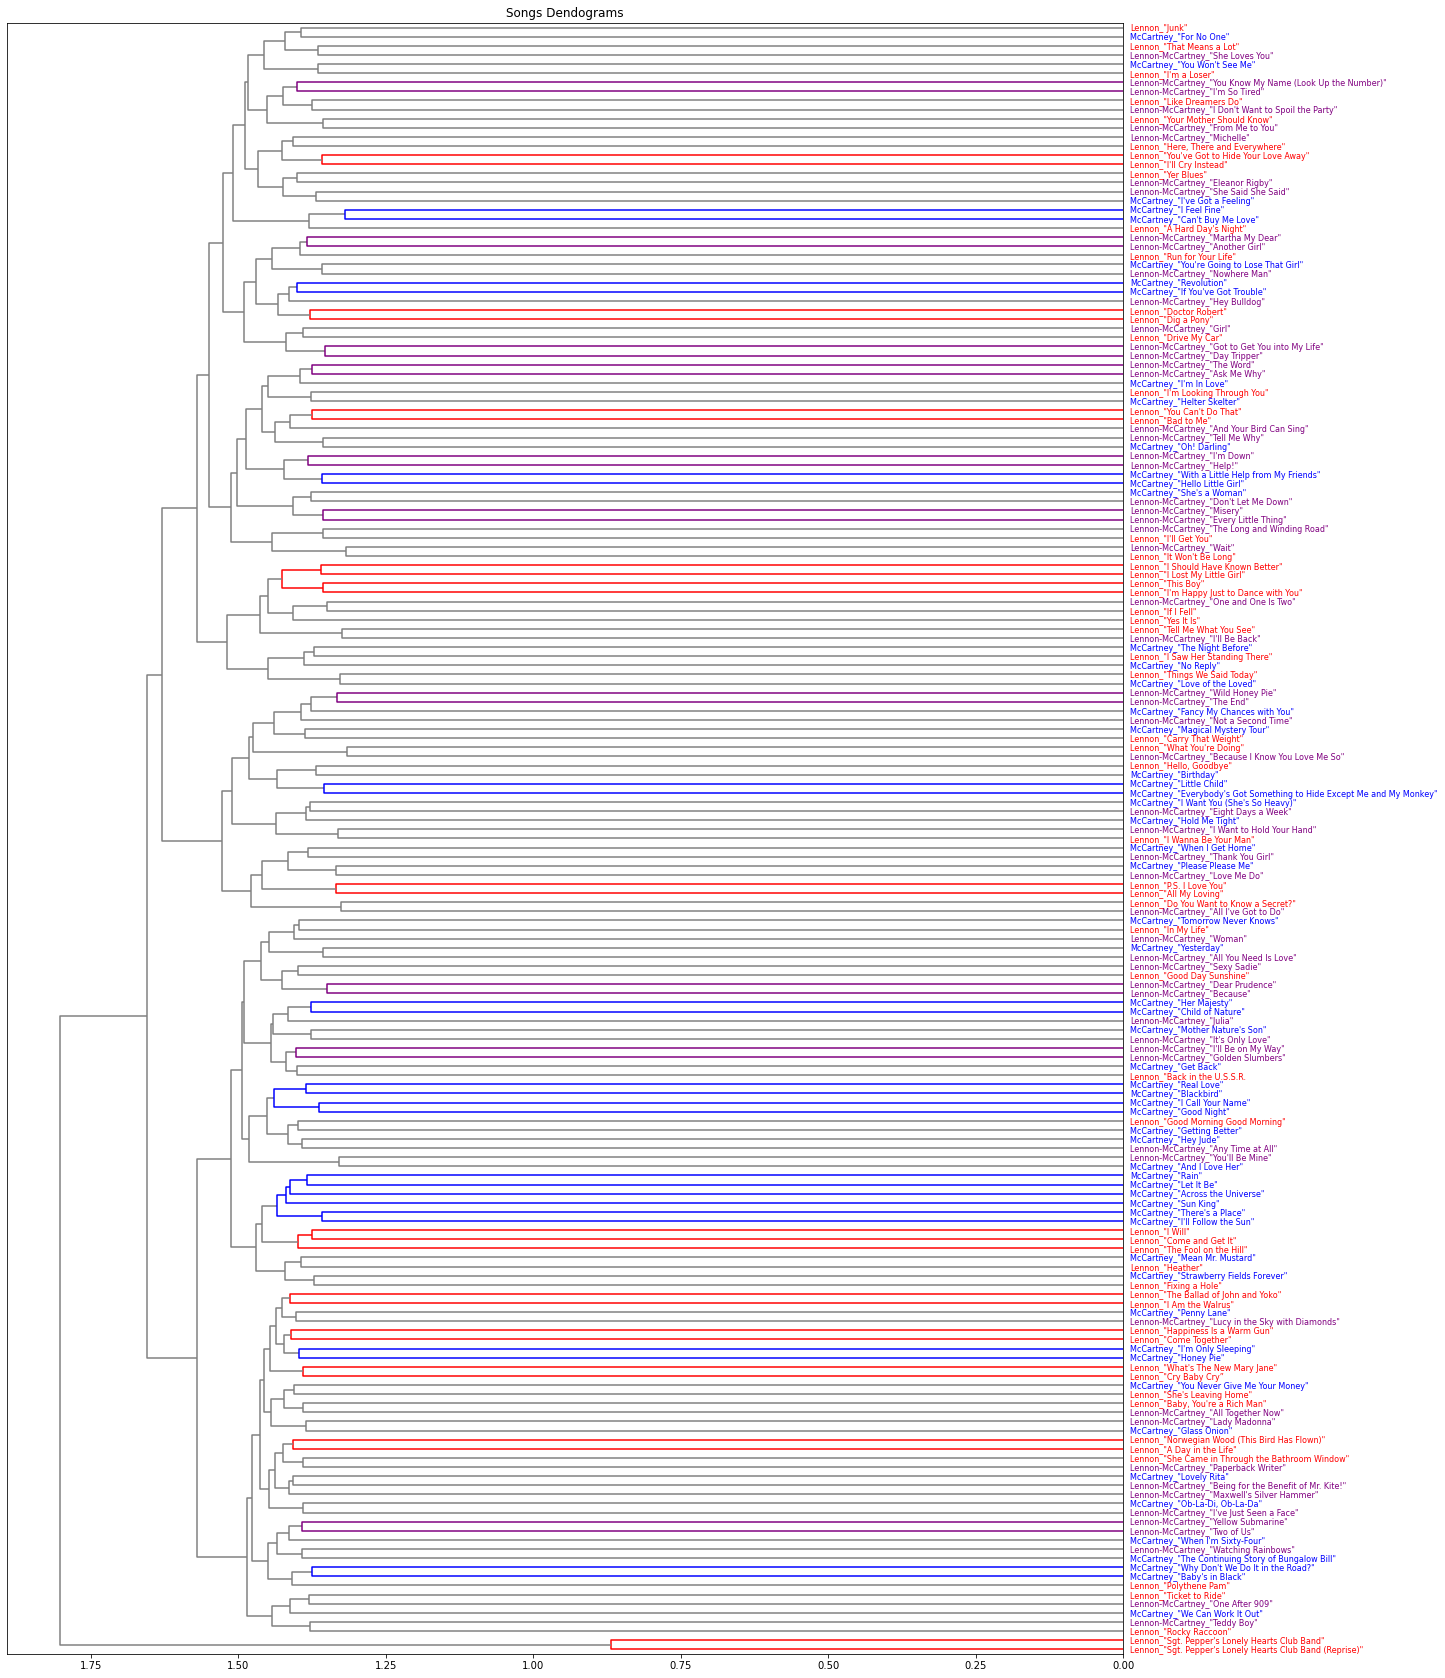

In [16]:
plt.figure(figsize=(20, 30))
#fig = plt.figure(figsize=(20, 30))
plt.title("Songs Dendograms")
#ax = fig.add_subplot(10,10,10)

shc.dendrogram(
            Z,
#            ax=ax,
#            truncate_mode='lastp',  # show only the last p merged clusters
#            p=len(labels),  # show only the last p merged clusters
            leaf_font_size=8, 
            orientation='left',
            color_threshold=None,
            labels = nodeLabels,
            link_color_func=lambda x: link_cols[x]
            )

plt.draw()

ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

#dend['leaves']
# Branch colors show «pure» clusters

and now onto an heatmap, based on crossing CAH:

<Figure size 2880x2880 with 0 Axes>

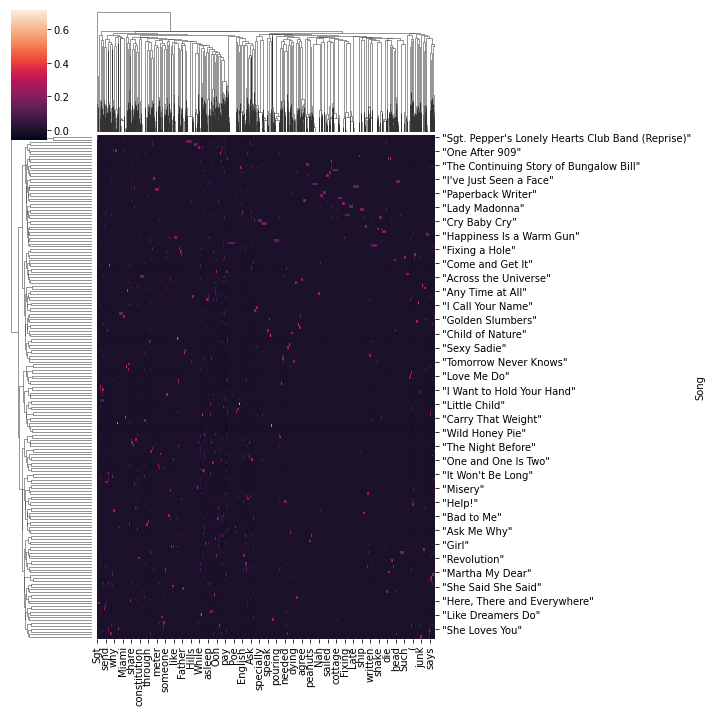

In [19]:
import seaborn as sns

plt.figure(figsize=(40,40))
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(scaled_features_countb,  method="ward") #does not accept Ward with Manhattan, but should
plt.show()

Not very useful for us. Actually, what we are trying to do is not preexistent in Seaborn, we need more imagination.

In [403]:
#scaled_features_countb.values
#[nodeLabels[i] for i in dend['leaves']]
#dists
#df = scaled_features_countb.reindex([label[1] for label in list(scaled_features_count.index[dend["leaves"]])])
#df
#dists
#[label for label in list(scaled_features_countb.index[dend["leaves"]])]

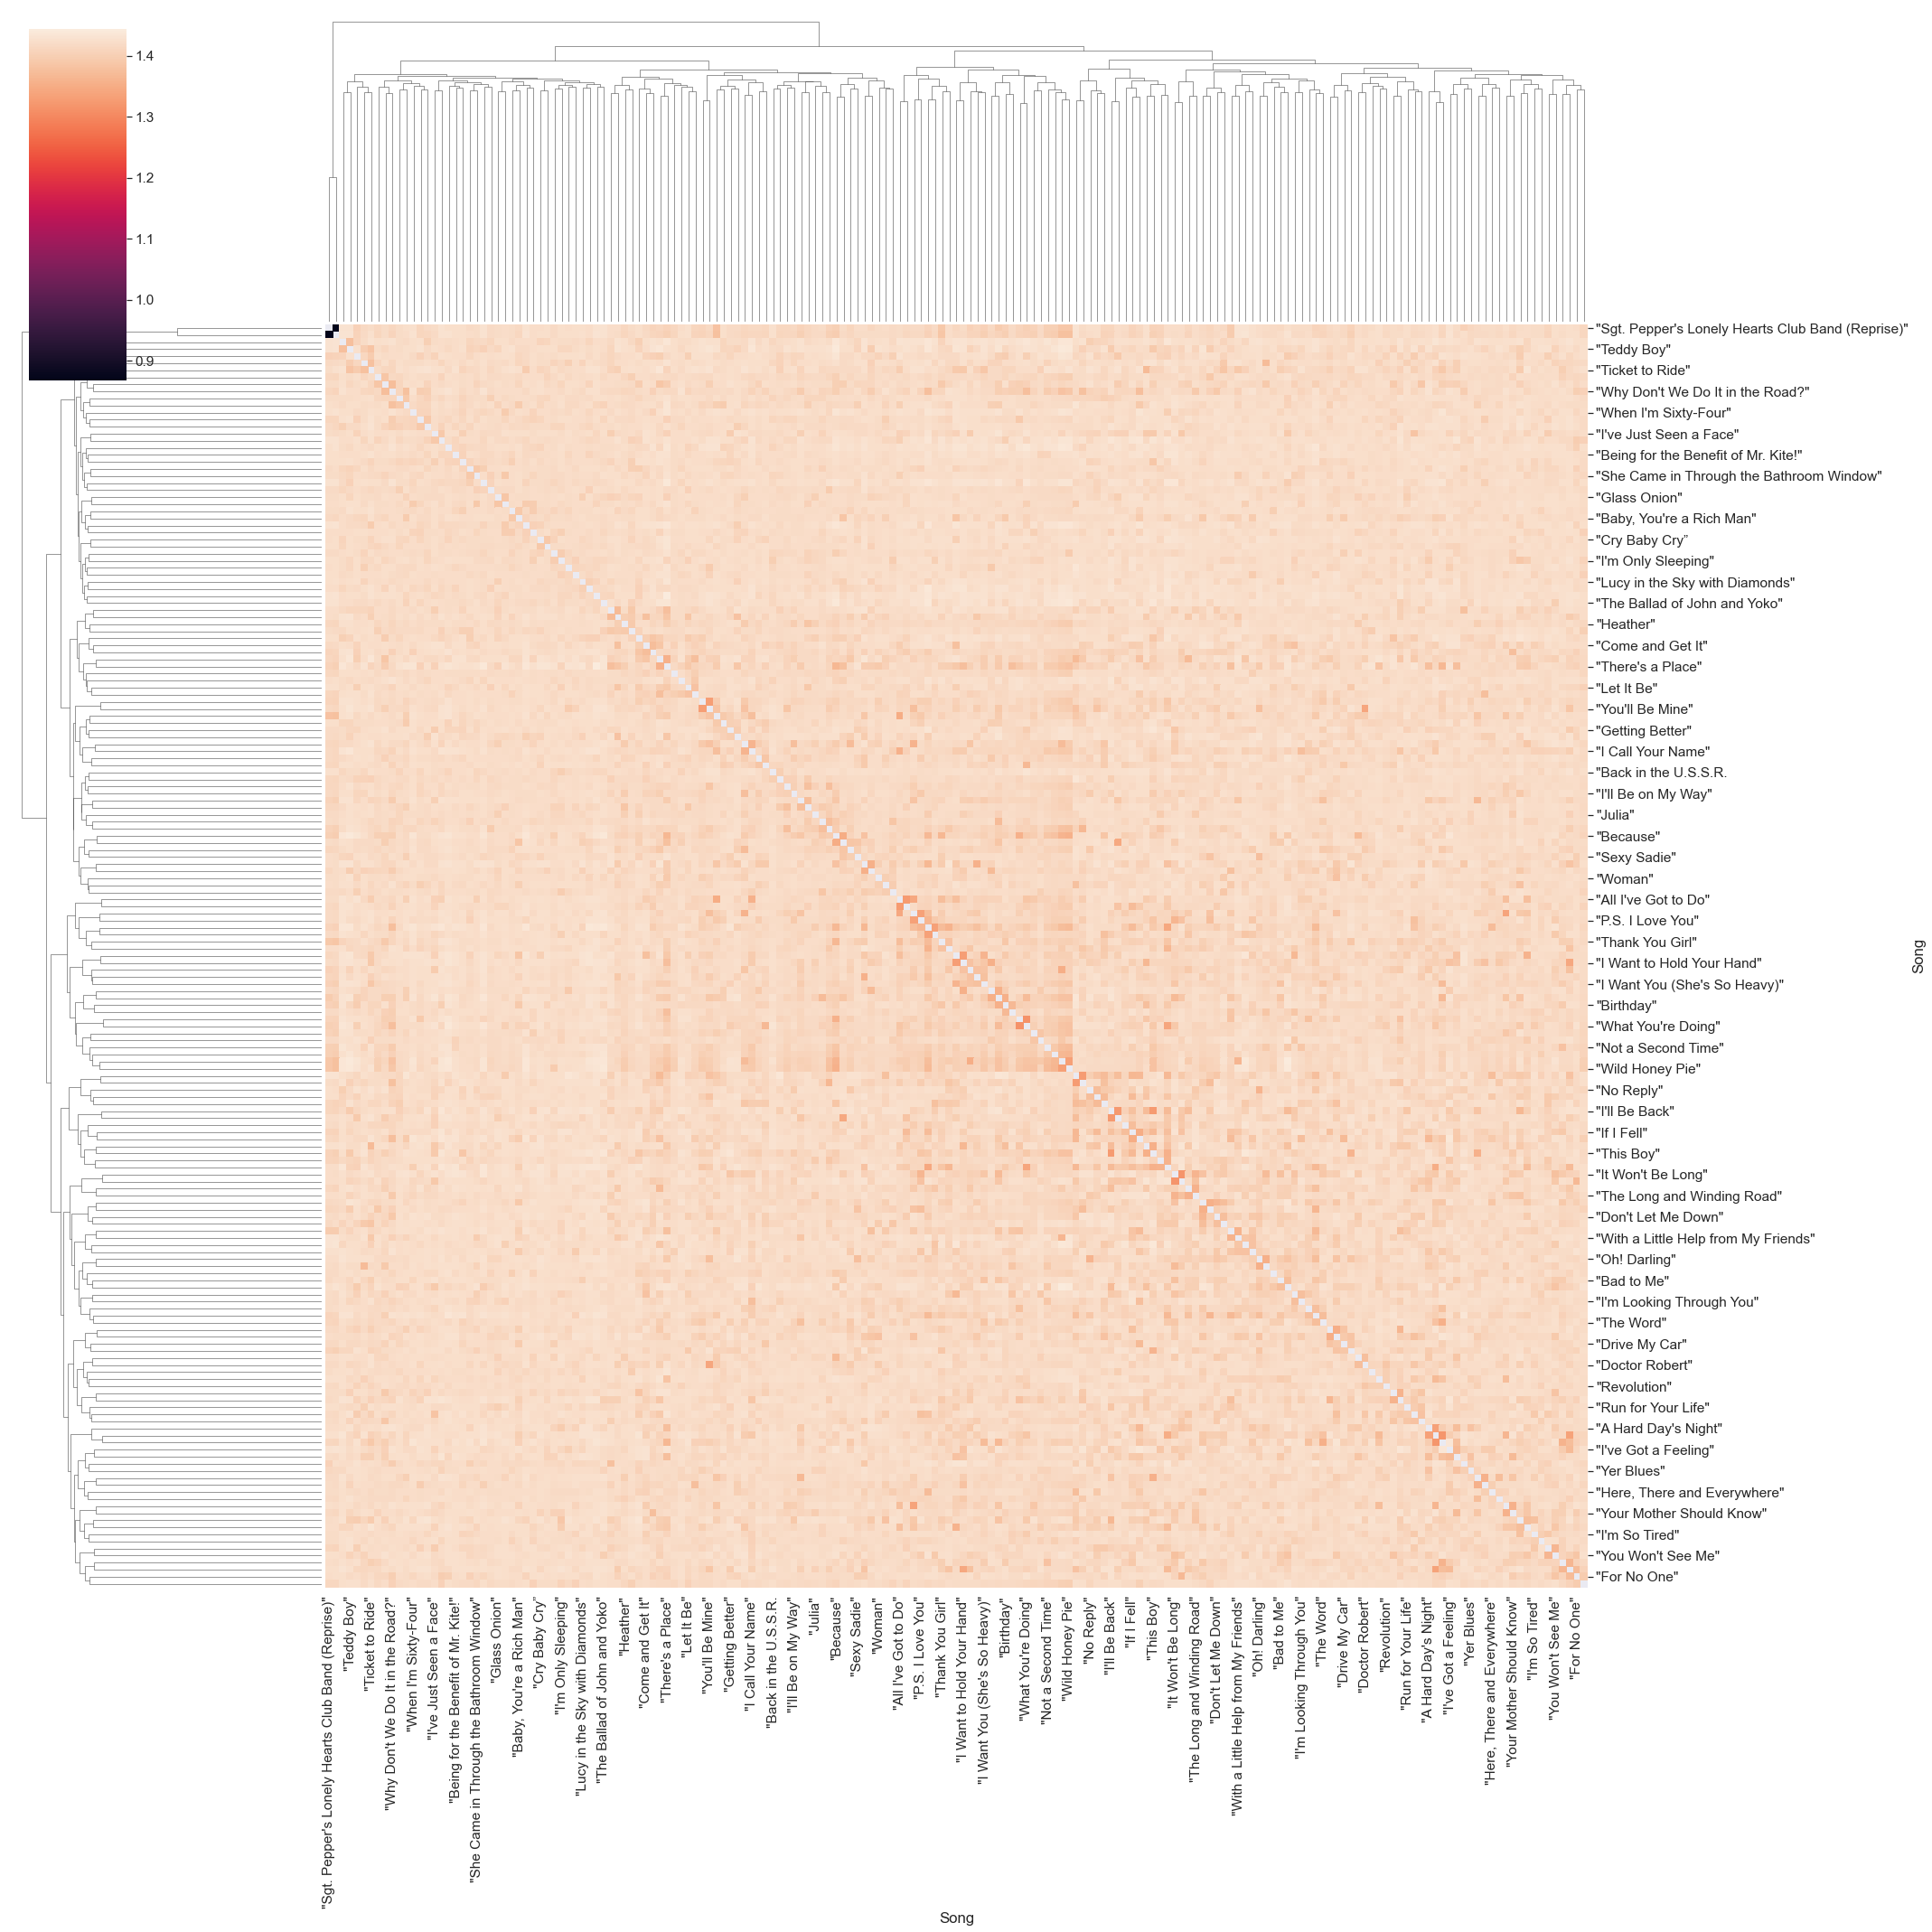

In [21]:
import scipy.spatial
from scipy.cluster.hierarchy import dendrogram, linkage

# get distance matrix
dists = pd.DataFrame(scipy.spatial.distance.cdist(scaled_features_countb.values, scaled_features_countb.values), 
             index=scaled_features_countb.index, columns=scaled_features_countb.index)
# Reorder rows and columns
dists = dists.reindex([label for label in list(scaled_features_countb.index[dend["leaves"]])], columns = [label for label in list(scaled_features_countb.index[dend["leaves"]])])


df = scaled_features_countb.reindex([label for label in list(scaled_features_countb.index[dend["leaves"]])])

Z = linkage(df, 'ward')

# mask 0 values to avoid messing the scales up (cf. edges length on dendrogram…)
mask = dists == 0

sns.set(font_scale=1.4)
sns.clustermap(dists, row_linkage=Z, col_linkage=Z, mask=mask, figsize=(30,30))
#sns.clustermap(dists, method="ward", cmap='RdBu', annot=True, annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));


To finish, it is also imaginable to apply dimensionnality reduction techniques, to explore the texts in two dimensions.

[0.11261171 0.09416768]


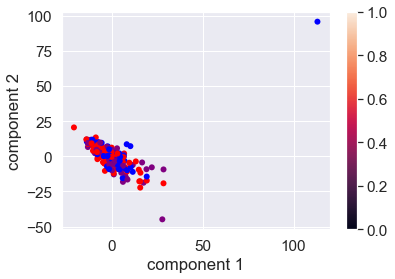

In [22]:
#count
from sklearn.decomposition import PCA, SparsePCA, MiniBatchSparsePCA
pca = PCA(n_components=2)
pca.fit(count)
print(pca.explained_variance_ratio_) # not so great

projected = pca.fit_transform(count)

# again, get some color



plt.scatter(projected[:, 0], projected[:, 1],
            c=[cols[i] for i in cols], edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

OUCH, PCA is very subject to outliers. Let's try a supposedly more robust version.

(NB: this one is a bit intensive. MiniBatchSparsePCA provides a more efficient if less exact version)

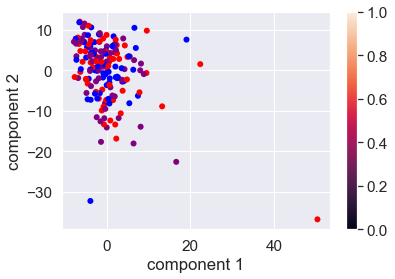

In [23]:
#pca = SparsePCA(n_components=2)
# if the previous is too long use:
pca = MiniBatchSparsePCA(n_components=2)
pca.fit(count)
#print(pca.explained_variance_ratio_) # not so great

projected = pca.fit_transform(count)


plt.scatter(projected[:, 0], projected[:, 1],
            c=[cols[i] for i in cols], edgecolor='none', )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**FIN DU PARCOURS MODIFIÉ**